<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Assignmnent11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

Github link:

**1. Dataset Selection and Preprocessing**

In [1]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

*Choose a publicly available image dataset suitable for classification.*

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# 70,000 grayscale images (28x28 pixels)
# 10 clothing categories
# Fashion MNIST is already split into training (60,000) and testing (10,000) sets.


Perform necessary preprocessing steps including:

*Loading the image files.*

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Dataset is already split

*Resizing images to a uniform size.*

In [4]:
# The images are already uniform size (28x28 pixels).

*Normalizing pixel values.*

In [5]:
# Pixel values range from 0 to 255, so normalization scales them to [0,1]:

X_train = X_train / 255.0
X_test = X_test / 255.0

*Splitting the dataset into training and testing sets.*

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [7]:
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Train set shape: (54000, 28, 28), (54000,)
Validation set shape: (6000, 28, 28), (6000,)
Test set shape: (10000, 28, 28), (10000,)


**2. Model Training**

*Random Forest Classifier:*

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

*Define the parameter grid for GridSearchCV. Create a dictionary with parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf.*

In [9]:
# Flatten the images (train and validation) since Random Forest doesn't handle 2D images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],          # number of trees
    'max_depth': [None, 10, 20],        # max depth of trees
    'min_samples_split': [2, 5],        # min samples to split a node
    'min_samples_leaf': [1, 2]          # min samples per leaf node
}

*Create a RandomForestClassifier using sklearn.ensemble.*

In [10]:
# Create Random Forest classifier

rf = RandomForestClassifier(random_state=42)

*Perform Grid Search using GridSearchCV from sklearn.model_selection to find the best parameters.*

In [11]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # use all CPU cores
    verbose=2           # print progress
)

# Perform grid search on training data
grid_search.fit(X_train_flat, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

*Print the best parameters and get the best model using the best_params_ and best_estimator_ attributes of the GridSearchCV object.*


In [28]:
# Print best parameters
print("Best parameters found:", grid_search.best_params_)

# Get best estimator
best_rf = grid_search.best_estimator_
print("\nBest estimator:",best_rf)

# Evaluate on validation set
y_val_pred = best_rf.predict(X_val_flat)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

# The model correctly classified 88% of the validation samples overall.

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best estimator: RandomForestClassifier(min_samples_split=5, random_state=42)

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       597
           1       1.00      0.97      0.98       608
           2       0.77      0.81      0.79       611
           3       0.87      0.93      0.90       587
           4       0.79      0.83      0.81       627
           5       0.97      0.96      0.96       621
           6       0.72      0.60      0.66       619
           7       0.93      0.94      0.93       550
           8       0.96      0.96      0.96       590
           9       0.95      0.95      0.95       590

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



*Train the Random Forest model on the training data.*

In [13]:
# Combine training and validation sets
import numpy as np

X_full_train = np.concatenate((X_train, X_val), axis=0)
y_full_train = np.concatenate((y_train, y_val), axis=0)

# Flatten the combined data
X_full_train_flat = X_full_train.reshape((X_full_train.shape[0], -1))

# Create a Random Forest classifier with best parameters from GridSearchCV
best_params = grid_search.best_params_
final_rf = RandomForestClassifier(**best_params, random_state=42)

# Train on the full training data
final_rf.fit(X_full_train_flat, y_full_train)

print("Final Random Forest model trained on full training data.")


Final Random Forest model trained on full training data.


**3. Model Evaluation**

*Make predictions on the test set using the best model.*

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten test data
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Make predictions
y_pred = final_rf.predict(X_test_flat)

*Evaluate the model using metrics such as accuracy, precision, recall, and F1-score.*

In [15]:
# Evaluate performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# All metrics have a score of around 0.87 which means the model is considered good

Accuracy:  0.8746
Precision: 0.8735
Recall:    0.8746
F1 Score:  0.8734


*Create a confusion matrix and classification report using confusion_matrix and classification_report from sklearn.metrics.*

In [16]:
# Print classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.80      0.78      1000
       Dress       0.87      0.90      0.89      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.70      0.60      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



*Visualize the confusion matrix using matplotlib.pyplot.*

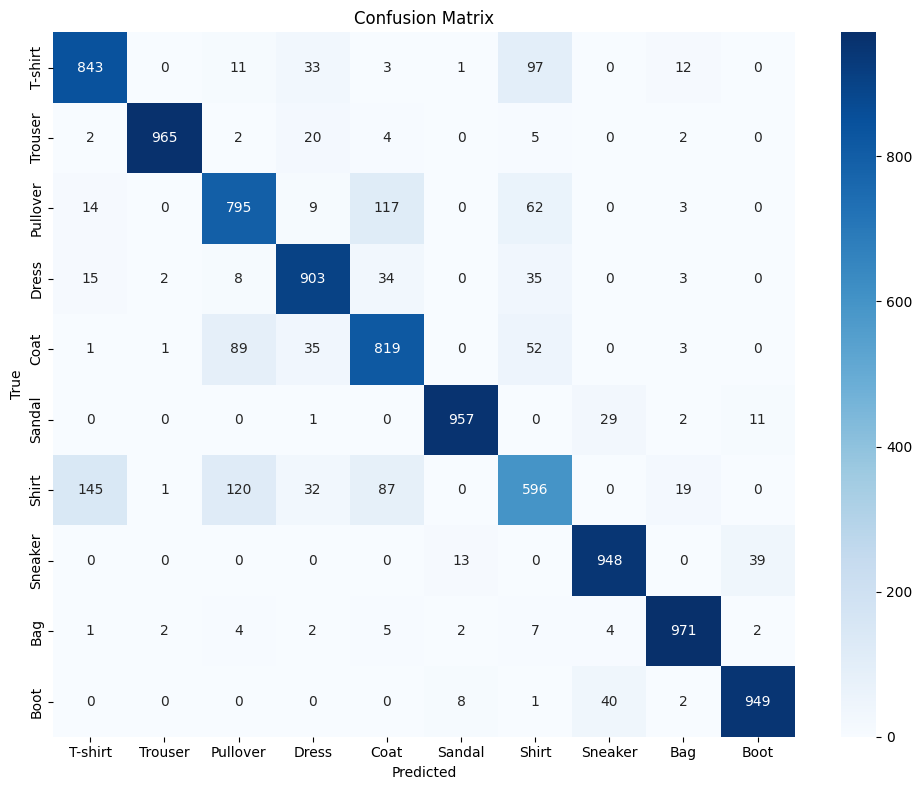

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[
                'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot'],
            yticklabels=[
                'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
           )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

**4. Feature Importance Visualization**

*Get feature importances from the best model using the feature_importances_ attribute.*

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get feature importances
importances = final_rf.feature_importances_

# 2. Reshape to 28x28 image shape (since each feature is a pixel)
importances_image = importances.reshape(28, 28)


*Create a bar plot of feature importances using matplotlib.pyplot.*

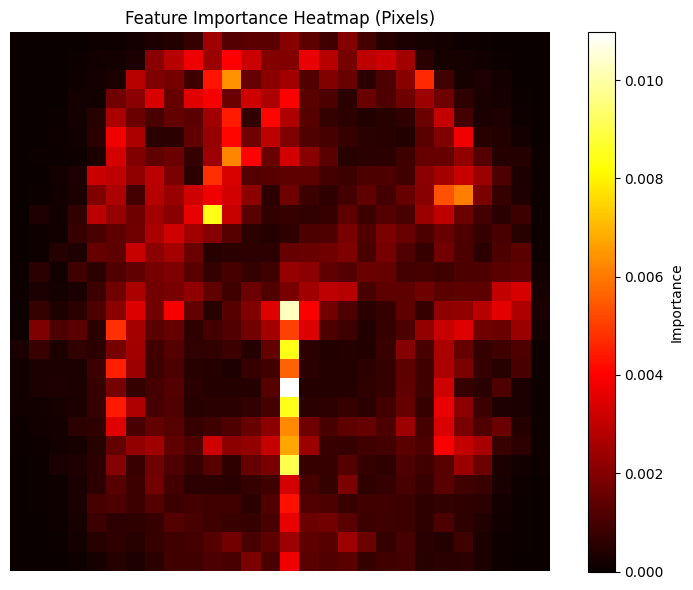

In [19]:
# 3. Plot heatmap of feature importance
plt.figure(figsize=(8, 6))
plt.imshow(importances_image, cmap='hot', interpolation='nearest')
plt.title("Feature Importance Heatmap (Pixels)")
plt.colorbar(label='Importance')
plt.axis('off')
plt.tight_layout()
plt.show()

**5. Prediction on New Images**

*Implement a function to predict the class of a new image.*

*Use the same preprocessing steps as in the data loading function.*


In [20]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# Class labels (same as used in training)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Prediction function
def predict_new_image(image_path, model):
    # Load and preprocess image
    img = imread(image_path, as_gray=True)                # convert to grayscale
    img_resized = resize(img, (28, 28), anti_aliasing=True)
    img_normalized = img_resized / 255.0                  # normalize pixel values
    img_flattened = img_normalized.flatten().reshape(1, -1)  # flatten and reshape for prediction

    # Predict
    prediction = model.predict(img_flattened)
    predicted_class = class_names[prediction[0]]

    print(f"Predicted Class: {predicted_class}")
    return predicted_class


*Test the function with a new image and print the predicted class.*

In [25]:
image_path = "dress.jpeg"
predict_new_image(image_path, final_rf)

Predicted Class: Sandal


'Sandal'

In [26]:
image_path = "bag.png"
predict_new_image(image_path, final_rf)

Predicted Class: Sandal


'Sandal'